<a href="https://colab.research.google.com/github/akitim/SkillFactory_current/blob/main/MATH%26ML_7_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%9D%D0%B0%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9_%D0%B1%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80_%D0%90%D0%BA%D0%B8%D0%BC%D0%BA%D0%B8%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px

# from scipy import stats
# from sklearn import linear_model
# from sklearn import preprocessing
from sklearn import model_selection
from sklearn.naive_bayes import ComplementNB
# from sklearn import tree
# from sklearn import ensemble
# from sklearn import metrics
# from sklearn import cluster
# from sklearn import feature_selection

import warnings
warnings.filterwarnings("ignore")

# from sys import getsizeof
# import pickle

# from google.colab import drive
# drive.mount('/content/drive')

path = "https://raw.githubusercontent.com/akitim/datasets/main/spam_or_not_spam.zip"
data = pd.read_csv(path)
data.sample(5)


,email,label
1196,indeed i was thinking of getting back into doi...,0
473,clearly our non silly non antiquated ideas ab...,0
2920,generic v agra NUMBER per NUMBERmg generic v ...,1
1393,nanananana c on friday august NUMBER NUMBER at...,0
772,o utensils of the world i wonder if it is poss...,0


In [45]:
# частоты классов, 1 - спам, 0 - не спам
class_num = data['label'].value_counts()
print(f"В датасете писем:\n\tcо спамом: {class_num[1]}" +\
      f"\n\tбез спама: {class_num[0]}\n")
class_freq = class_num / data['label'].size
# labels = class_freq.index.to_list()
class_freq

В датасете писем:
	cо спамом: 500
	без спама: 2500



0    0.833333
1    0.166667
Name: label, dtype: float64

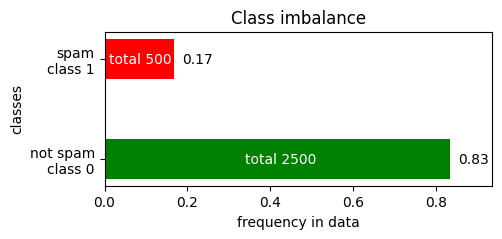

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
ax.barh(y=['not spam\nclass 0', 'spam\nclass 1'], width=class_freq,
        height=0.4, color=['g', 'r']);
ax.set_ylabel('classes');
ax.set_xlabel('frequency in data');
ax.set_title('Class imbalance');
ax.text(class_freq[0] / 2 - 0.078, -0.05, f'total {class_num[0]}',
        fontdict={'size': 10, 'c':'w'});
ax.text(class_freq[0] + 0.02, -0.05, f'{np.round(class_freq[0], 2)}',
        fontdict={'size': 10, 'c':'black'});
ax.text(class_freq[1] / 2 - 0.072, 0.95, f'total {class_num[1]}',
        fontdict={'size': 10, 'c':'w'});
ax.text(class_freq[1] + 0.02, 0.95, f'{np.round(class_freq[1], 2)}',
        fontdict={'size': 10, 'c':'black'});
ax.set_xbound(ax.get_xbound()[0], ax.get_xbound()[1] + 0.06)

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [48]:
data_clean = data.copy()
data_clean["email"] = data_clean["email"].str.replace('\W+', ' ').\
    str.replace('\s+', ' ').str.strip().str.lower()
data_clean["email"][data_clean["email"] == ''] = np.NaN
data_clean.dropna(inplace=True)


Переводим данные в векторный вид:

In [49]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean["email"])


Определите, сколько теперь признаков в нашем наборе данных:

In [50]:
print("Признаков в наборе данных:", X.shape[1])

Признаков в наборе данных: 34116


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [52]:
X = np.asarray(X.todense())
y = data_clean['label'].values


Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [53]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
) #[1].shape
X_train, X_test, y_train, y_test =  np.asarray(X_train), np.asarray(X_test),\
     np.asarray(y_train), np.asarray(y_test)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [54]:
np.round(y_test.mean(), 3)

0.165

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [55]:
# from sklearn.naive_bayes import ComplementNB
NB_compl = ComplementNB(alpha=0.01)
NB_compl.fit(X_train, y_train);


Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [56]:
class BinClfMetrics:
    '''
    Класс реализует некоторые метрики для бинарной классификации
    '''
    def __init__(self, y_true, y_pred, y_proba=None) -> None:
        self.TP = np.sum((y_pred + y_true) == 2)
        self.TN = np.sum((y_pred + y_true) == 0)
        self.FP = np.sum(y_pred[y_true == 0] == 1)
        self.FN = np.sum(y_pred[y_true == 1] == 0)

    def precision(self):
        return self.TP / (self.TP + self.FP)

    def accuracy(self):
        return (self.TP + self.TN) / (self.TP + self.TN + self.FP + self.FN)

    def balanced_accuracy(self):
        return (self.TP / (self.TP + self.FN) +\
                self.TN / (self.TN + self.FP) ) / 2

    def recall(self):
        return self.TP / (self.TP + self.FN)

    def specificity(self):
         return self.TN / (self.TN + self.FP)

    def f1_score(self):
         return 2 * self.TP / (2 * self.TP + self.FP + self.FN)

# from sklearn.metrics import precision_score, recall_score
# from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score
y_pred = NB_compl.predict(X_test)
y_proba = NB_compl.predict_proba(X_test)

# TP = np.sum(y_pred + y_test == 2)
# TN = np.sum(y_pred + y_test == 0)
# FP = np.sum(y_pred[y_test == 0] == 1)
# FN = np.sum(y_pred[y_test == 1] == 0)

mt = BinClfMetrics(y_test, y_pred)
metrics_df = pd.DataFrame(
    {'Precision': [mt.precision()], # [TP / (TP + FP)],
     'Accuracy': [mt.accuracy()], #[(TP + TN) / (TP + TN + FP + FN)],
     'Balanced accuracy': [mt.balanced_accuracy()], #[(TP / (TP + FN) + TN / (TN + FP) ) / 2],
     'Recall(sensitivity)': [mt.recall()], #[TP / (TP + FN)],
     'Specificity': [mt.specificity()], #[TN / (TN + FP)],
     'F1-score': [mt.f1_score()] #[2 * TP / (2 * TP + FP + FN)]
     }, index = ['metrics value']).T
metrics_df['metrics value'] = metrics_df['metrics value'].round(3)
metrics_df

,metrics value
Precision,1.000
Accuracy,0.988
Balanced accuracy,0.964
Recall(sensitivity),0.927
Specificity,1.000
F1-score,0.962


Нарисуйте ROC-кривую:

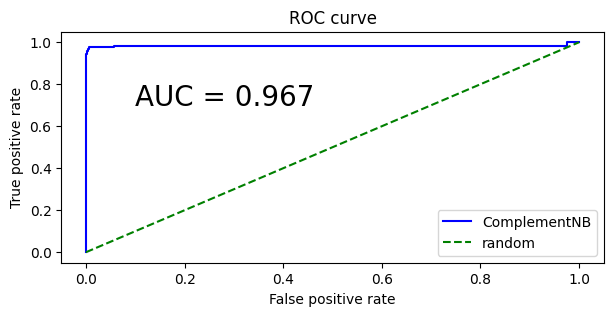

In [57]:
def ROC_curve_custom(y_true, y_proba, detail=10):
    '''
    Расчет ROC кривой для бинарного классификатора
    Параметры:
    y_true: ndarray - вектор реальных классов объектов размером (n_samples,)
    y_proba: ndarray - вектор предсказаний вероятности класса 1
                             размером (n_samples,)
    detail: int [0, inf] - детализация кривой

    Возвращает:
    tuple(FPR, TPR, thresholds)
    FPR: ndarray - вектор значений false positive rate
                   размером (len(thresholds),)
    TPR: ndarray - вектор значений
                   true positive rate размером  (len(thresholds),)
    thresholds: ndarray - вектор значений порогов, длина зависит от detail
    '''
    y_proba_ = y_proba.copy()
    #кол-во элементов класса 1
    N_pos = np.sum(y_true)
    #кол-во элементов класса 0
    N_neg = - np.sum(y_true - 1) #y_true.size - N_pos
    # пороги - уник. зн-я y_proba после округления для кл. 1 в убыв. порядке
    thresholds = np.insert(sorted(np.unique(np.round(y_proba, detail)),
                                  reverse=True), 0, 2.5)
    # thresholds = sorted(np.percentile(
    #     y_proba_, np.linspace(0, 100, n_points)),
    #                     reverse=True)
    FPR = [] #false pos rate
    TPR = [] #true neg rate
    for threshold in thresholds:
        FPR += [np.sum(y_proba_[y_true == 0] > threshold) / N_neg]
        TPR += [np.sum(y_proba_[y_true == 1] > threshold) / N_pos]

    return np.asarray(FPR), np.asarray(TPR), np.asarray(thresholds)

def ROC_AUC_custom(y_true, y_proba):
    '''
    Расчет площади под ROC кривой (ROC-AUC) для бинарного классификатора
    Параметры:
    y_true: ndarray - вектор реальных классов объектов размером (n_samples,)
    y_proba: ndarray - вектор предсказаний вероятности класса 1
                             размером (n_samples,)
    Возвращает:
    ROC-AUC: float
    '''
    FPR, TPR, _ = ROC_curve_custom(y_test, y_proba, detail=10)
    # находим площадь под ROC методом трапеций
    dFPR = FPR[1:] - FPR[:-1] #высоты
    halfsum_TPR = (TPR[1:] + TPR[:-1]) / 2 #полусуммы оснований
    return np.sum(dFPR * halfsum_TPR)

# вычисляем ROC
FPR, TPR, thrs = ROC_curve_custom(y_test, y_proba[:, 1])
ROC_AUC = ROC_AUC_custom(y_test, y_proba[:, 1])

# для ступенчатого вида ROC как в sklearn
FPR_step = np.append(np.ravel(list(zip(FPR, FPR)))[1:], 1)
TPR_step = np.append(np.ravel(list(zip(TPR, TPR)))[:-1], 1)

fig, ax = plt.subplots(1, 1, figsize=(7, 3))
ax.plot(FPR_step, TPR_step, 'b-', label='ComplementNB');
ax.set_xlabel('False positive rate');
ax.set_ylabel('True positive rate');
# # ax.set_xlim(-0.001, 0.1);
# ax.set_ylim(0.97, 1.001);
ax.set_title('ROC curve');
ax.text(0.1, 0.75-0.05, f'AUC = {np.round(ROC_AUC, 5)}', fontdict={'size':20});
ax.plot([0, 1], [0, 1], 'g--', label='random', );
ax.legend();


In [61]:
# delete
def cross_validate_custom(estimator, X, y, n_folds=5,
                          scores=['balanced_accuracy']):
    '''
    '''
    # словарь для записи метрик на фолдах
    scores_dict = {
        'Precision': [], 'Accuracy': [], 'Balanced accuracy': [],
        'Recall': [], 'Specificity': [], 'F1-score': []
        }

    pos_ind_all = np.asarray([i for i, lbl in enumerate(y) if lbl])
    neg_ind_all = np.asarray([i for i, lbl in enumerate(y) if not lbl])
    n_pos = len(pos_ind_all)
    n_neg = len(neg_ind_all)

    pos_fold_size = n_pos // n_folds
    neg_fold_size = n_neg // n_folds

    # маски для разбиения индексов классов по фолдам
    pos_fold_masks = np.random.permutation(np.ravel(
        [np.random.permutation(n_folds) for i in range(pos_fold_size + 1)]
        ))[:n_pos]
    neg_fold_masks = np.random.permutation(np.ravel(
        [np.random.permutation(n_folds) for i in range(neg_fold_size + 1)]
        ))[:n_neg]

    # массивы массивов индексов классов 0 и 1, каждый подмассив соотв. одному фолду
    neg_folds_ind = np.asarray(
        [neg_ind_all[neg_fold_masks == f] for f in range(n_folds)])
    pos_folds_ind = np.asarray(
        [pos_ind_all[pos_fold_masks == f] for f in range(n_folds)])

    for f in range(n_folds):
        # лейблы для валидационных фолдов
        train_lbls = [i for i in range(n_folds) if i != f]
        # делаем массив индексов плоским
        train_pos_inds = [ind for subarr in pos_folds_ind[train_lbls] \
                          for ind in subarr]
        valid_pos_inds = pos_folds_ind[f]
        train_neg_inds = [ind for subarr in neg_folds_ind[train_lbls] \
                          for ind in subarr]
        valid_neg_inds = neg_folds_ind[f]

        y_train_cv = y[np.append(train_pos_inds, train_neg_inds)]
        X_train_cv = X[np.append(train_pos_inds, train_neg_inds), :]
        y_valid_cv = y[np.append(valid_pos_inds, valid_neg_inds)]
        X_valid_cv = X[np.append(valid_pos_inds, valid_neg_inds), :]

        estimator.fit(X_train_cv, y_train_cv)
        y_valid_pred = estimator.predict(X_valid_cv)

        mt_ = BinClfMetrics(y_valid_cv, y_valid_pred)
        # bal_accs += [mt_.balanced_accuracy()]
        for score in scores:
            scores_dict[score] += []
        {'Precision': [mt.precision()],
        'Accuracy': [mt.accuracy()],
        'Balanced accuracy': [mt.balanced_accuracy()],
        'Recall': [mt.recall()],
        'Specificity': [mt.specificity()],
        'F1-score': [mt.f1_score()]
        }
        # , index = ['metrics value']
        # TP = np.sum(y_valid_cv + y_valid_pred == 2)
        # TN = np.sum(y_valid_cv + y_valid_pred == 0)
        # FP = np.sum(y_valid_pred[y_valid_cv == 0] == 1)
        # FN = np.sum(y_valid_pred[y_valid_cv == 1] == 0)

        # bal_accs += [(TP / (TP + FN) + TN / (TN + FP) ) / 2]

    return np.asarray(bal_accs)

# estimator = ComplementNB(alpha=0.01)
# y_ = y #y_train
# X_ = np.asarray(X) #X_train
# n_folds = 10

# pos_ind_all = np.asarray([i for i, lbl in enumerate(y_) if lbl])
# neg_ind_all = np.asarray([i for i, lbl in enumerate(y_) if not lbl])
# n_pos = len(pos_ind_all)
# n_neg = len(neg_ind_all)

# pos_fold_size = n_pos // n_folds
# neg_fold_size = n_neg // n_folds

# # маски для разбиения индексов классов по фолдам
# pos_fold_masks = np.random.permutation(np.ravel(
#     [np.random.permutation(n_folds) for i in range(pos_fold_size + 1)]
#     ))[:n_pos]
# neg_fold_masks = np.random.permutation(np.ravel(
#     [np.random.permutation(n_folds) for i in range(neg_fold_size + 1)]
#     ))[:n_neg]

# # массивы массивов индексов классов 0 и 1, каждый подмассив соотв. одному фолду
# neg_folds_ind = np.asarray(
#     [neg_ind_all[neg_fold_masks == f] for f in range(n_folds)])
# pos_folds_ind = np.asarray(
#     [pos_ind_all[pos_fold_masks == f] for f in range(n_folds)])

# bal_accs = []
# for f in range(n_folds):
#     # лейблы для валидационных фолдов
#     train_lbls = [i for i in range(n_folds) if i != f]
#     # делаем массив индексов плоским
#     train_pos_inds = [ind for subarr in pos_folds_ind[train_lbls] \
#                       for ind in subarr]
#     valid_pos_inds = pos_folds_ind[f]
#     train_neg_inds = [ind for subarr in neg_folds_ind[train_lbls] \
#                       for ind in subarr]
#     valid_neg_inds = neg_folds_ind[f]

#     y_train_cv = y_[np.append(train_pos_inds, train_neg_inds)]
#     X_train_cv = X_[np.append(train_pos_inds, train_neg_inds), :]
#     y_valid_cv = y_[np.append(valid_pos_inds, valid_neg_inds)]
#     X_valid_cv = X_[np.append(valid_pos_inds, valid_neg_inds), :]

#     estimator.fit(X_train_cv, y_train_cv)
#     y_valid_pred = estimator.predict(X_valid_cv)
#     # mt_ = BinClfMetrics(y_valid_cv, y_valid_pred)
#     # bal_accs += [mt_.balanced_accuracy()]
#     TP = np.sum(y_valid_cv + y_valid_pred == 2)
#     TN = np.sum(y_valid_cv + y_valid_pred == 0)
#     FP = np.sum(y_valid_pred[y_valid_cv == 0] == 1)
#     FN = np.sum(y_valid_pred[y_valid_cv == 1] == 0)

#     bal_accs += [(TP / (TP + FN) + TN / (TN + FP) ) / 2]

# TP = np.sum(y_pred + y_test == 2)
# TN = np.sum(y_pred + y_test == 0)
# FP = np.sum(y_pred[y_test == 0] == 1)
# FN = np.sum(y_pred[y_test == 1] == 0)

bal_accs = cross_validate_custom(estimator=ComplementNB(alpha=0.01), X=X, y=y)
bal_accs

array([0.96698795, 0.98989899, 0.97      , 0.979     , 0.98069388])

In [59]:
# delete
# BinClfMetrics(y_true=y_valid_cv, y_pred=y_valid_pred)
type(np.asarray(X))

numpy.ndarray

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [60]:
alphas = np.logspace(-4, 1, 6)
# alphas
for alpha in alphas:
    alpha